# COVID-19 ANALYSIS

This is an analysis of the COVID-19 pandemic in South Africa from March to August 2020

# Load libraries

In [28]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from ggplot import *
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#national_report = pd.read_csv('../data/nicd_daily_national_report.csv')
confirmed = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv')
recoveries = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_recoveries.csv')
deaths = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_deaths.csv')

In [5]:
hospitals = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/health_system_za_hospitals_v1.csv')

In [6]:
confirmed['date'] = pd.to_datetime(confirmed['date'], format='%d-%m-%Y')
confirmed.tail(3)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
171,2020-08-25,20200825,85311.0,35603.0,206892.0,110521.0,12703.0,23336.0,9375.0,24445.0,104781.0,50.0,613017,https://twitter.com/nicd_sa/status/12983516283...
172,2020-08-26,20200826,85472.0,35980.0,207610.0,111096.0,12795.0,23555.0,9500.0,24646.0,104997.0,50.0,615701,https://twitter.com/nicd_sa/status/12987029468...
173,2020-08-27,20200827,85625.0,36419.0,208156.0,111585.0,12867.0,23677.0,9829.0,24805.0,105273.0,50.0,618286,https://twitter.com/nicd_sa/status/12990610006...


In [20]:
recoveries['date'] = pd.to_datetime(recoveries['date'], format='%d-%m-%Y')
recoveries.tail(3)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
124,2020-08-25,20200825,80614,21174,175407,93019,11488,21370,6381,17008,93920,0,520381,https://twitter.com/nicd_sa/status/12983516283...
125,2020-08-26,20200826,80614,22740,176513,93814,11580,21370,6409,17702,94500,0,525242,https://twitter.com/nicd_sa/status/12987029468...
126,2020-08-27,20200827,81373,22829,178479,94680,11639,21591,6640,17993,96114,0,531338,https://twitter.com/nicd_sa/status/12990610006...


In [7]:
deaths['date'] = pd.to_datetime(deaths['date'], format='%d-%m-%Y')
deaths.tail(3)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
147,2020-08-25,20200825,2816,567,3334,1997,179,312,116,224,3763,0,13308,https://twitter.com/nicd_sa/status/12983516283...
148,2020-08-26,20200826,2828,567,3395,2054,179,312,120,224,3823,0,13502,https://twitter.com/nicd_sa/status/12987029468...
149,2020-08-27,20200827,2853,567,3428,2102,179,312,120,224,3843,0,13628,https://twitter.com/nicd_sa/status/12990610006...


Create a new dataframe with the total number of confirmed positive cases, recoveries and deaths.

In [8]:
# combine the number of cases into a new dataframe
total_cases = pd.concat([confirmed['date'], confirmed['total'],
                         recoveries['total'], deaths['total']], axis=1)

In [9]:
total_cases['confirmed'] = confirmed['total']
total_cases['recoveries'] = recoveries['total']
total_cases['deaths'] = deaths['total']

# convert date column from string to datetime
total_cases['date'] = pd.to_datetime(total_cases['date'], format='%d-%m-%Y')

In [10]:
# drop the repeated columns
total_cases = total_cases.drop(['total', 'total', 'total'], axis=1)

In [11]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        174 non-null    datetime64[ns]
 1   confirmed   174 non-null    int64         
 2   recoveries  127 non-null    float64       
 3   deaths      150 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 5.6 KB


In [12]:
# shift rows down so that dates correspond
total_cases['recoveries'] = total_cases['recoveries'].shift(47)
total_cases['deaths'] = total_cases['deaths'].shift(24)

In [138]:
total_cases['recoveries'] = total_cases['recoveries'].fillna(0)
total_cases['deaths'] = total_cases['deaths'].fillna(0)

In [139]:
total_cases.head()

,date,confirmed,recoveries,deaths
0,2020-03-05,1,0.0,0.0
1,2020-03-07,2,0.0,0.0
2,2020-03-08,3,0.0,0.0
3,2020-03-09,7,0.0,0.0
4,2020-03-11,13,0.0,0.0


Recoveries were recorded only 47 days after the first positive case was confirmed, and deaths were first reported after 24 days. To date there are 525 242 recoveries and 13 502 deaths. 

## Confirmed cases, recoveries and deaths

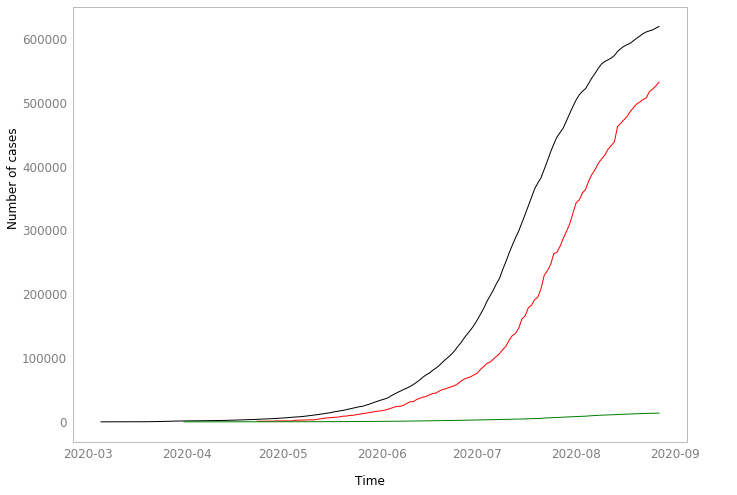

<ggplot: (-9223371877547561177)>

In [137]:
# plot the number of positive cases and recoveries
ggplot(total_cases, aes(x='date')) + \
    geom_line(aes(y='confirmed'), color='black') + \
    geom_line(aes(y='recoveries'), color='red') + \
    geom_line(aes(y='deaths'), color='green') + \
    xlab('Time') + \
    ylab('Number of cases') + \
    theme_bw() + \
    theme()
# this graph still needs a legend

## Cases by province

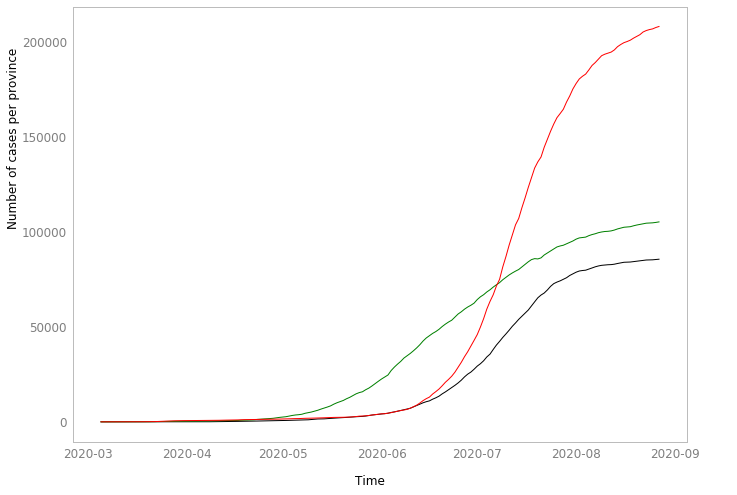

<ggplot: (127510436879)>

In [29]:
ggplot(confirmed, aes(x='date')) + \
    geom_line(aes(y='EC'), color='black') + \
    geom_line(aes(y='WC'), color='green') + \
    geom_line(aes(y='GP'), color='red') + \
    xlab('Time') + \
    ylab('Number of cases per province') + \
    theme_bw() + \
    theme()

# SIR Modelling

In order to model how the virus will spread we need to use the SIR model which requires the number of susceptible individuals, those who have been infected and those who have recovered. Two epidemiological quantities are also needed: the infection rate and the recovery rate. The reproductive rate of the virus when the first case was reported was 2.07. At the moment the model does not account for lockdown and travel restrictions.
The code for this model was obtained from scipython.com.

In [140]:
# total population
N = 59431006

# recoveries & active infections
I0 = 1
R0 = 0

# susceptible
S0 = N - I0 - R0

# infection rate
B = 2.07

# recovery rate
G = 1/14

# set the number of days to 250
t = range(0, 250)

In [141]:
# SIR model differential equations
def derivative(y, t, N, B, G):
    S, I, R = y
    dSdt = -B * S * I / N
    dIdt = B * S * I / N - G * I
    dRdt = G * I
    return dSdt, dIdt, dRdt

In [142]:
# initial conditions
y0 = S0, I0, R0
ret = odeint(derivative, y0, t, args=(N, B, G))
S, I, R = ret.T

# create a dataframe for S, I and R
infection_model = pd.DataFrame(
    {'susceptible': S,
     'infected': I,
     'recovered': R,
     'days': t})

In [133]:
infection_model.tail()

,susceptible,infected,recovered,days
245,0.000015,2.835992,5.943100e+07,245
246,0.000015,2.640486,5.943100e+07,246
247,0.000015,2.458459,5.943100e+07,247
248,0.000015,2.288979,5.943100e+07,248
249,0.000015,2.131183,5.943100e+07,249


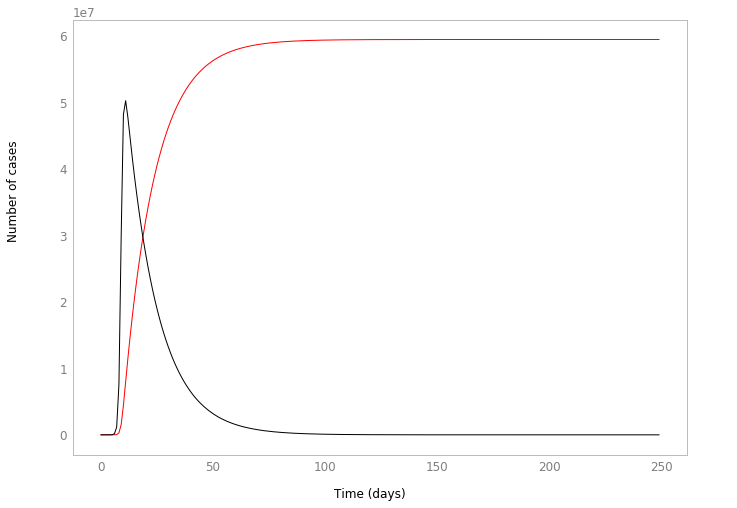

<ggplot: (-9223371877550148629)>

In [143]:
ggplot(infection_model, aes(x='days')) + \
    geom_line(aes(y='recovered'), color='red') + \
    geom_line(aes(y='infected'), color='black') + \
    xlab('Time (days)') + \
    ylab('Number of cases') + \
    theme_bw() + \
    theme()